In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Usecase_Dataset.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,17,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(1000000, 215)

In [6]:
df.head()

ind_urn mag_magazine_code mag_expiration_date  mag_record_type  \
0     1959                CT          2002-09-30                0   
1     3210                CT          2009-08-31                0   
2     5391                CT          1998-02-28                0   
3     7197                CT          2014-04-30                0   
4     8184                CT          2019-08-31                0   

   products_recently_purchased email_presence_flag date_individual_added city  \
0                            9                   Y            1996-07-15   SP   
1                           18                   N            1996-07-15   EA   
2                            6                   Y            1997-04-15   GI   
3                           12                   Y            1996-07-15   PA   
4                           75                   Y            1996-07-15   PA   

  state country_code  ... ib_investing_real_estate ib_fishing  \
0    MA            U  ...                      NaN        NaN   
1    MA            U  ...                      NaN        NaN   
2    PA            U  ...                      NaN        NaN   
3    MA            U  ...                      NaN        NaN   
4    FL            U  ...                        Y        NaN   

   ib_hunting_shooting  ib_environmental_issues ib_golf_participant  \
0                  NaN                      NaN                 NaN   
1                  NaN                      NaN                   Y   
2                  NaN                      NaN                   Y   
3                    Y                      NaN                   Y   
4                  NaN                      NaN                   Y   

  ib_motorcycling  ib_home_furnish_decorate ib_gardening  HomeValue  \
0             NaN                       NaN          NaN          K   
1             NaN                         Y            Y          K   
2             NaN                         Y          NaN          I   
3             NaN                         Y            Y          F   
4             NaN                         Y            Y          M   

  Active_Subscriber  
0                 Y  
1                 Y  
2                 Y  
3                 Y  
4                 Y  

[5 rows x 215 columns]

In [20]:
df.ib_environmental_issues.unique()

array([nan, 'Y'], dtype=object)

In [23]:
df.ib_collectible_gen.value_counts()

Y    309639
Name: ib_collectible_gen, dtype: int64

In [7]:
import pandas_profiling as pp

In [16]:
pp.ProfileReport(df1)

In [3]:
df1=df

In [9]:
pp.ProfileReport(df1)

In [4]:
#highly correlated features removing from model
df1=df1.drop(columns=['birth_month','ib_income_rollup','ib_age_input_individual','ib_pp_household_size','ib_pp_number_of_adults','ib_pp_number_of_children','mag_magazine_code','ib_prem_household_size','ib_prem_number_of_children'],axis=1)

In [5]:
pct_null = df1.isnull().sum() / len(df1)
missing_features = pct_null[pct_null > 0.80].index
df1.drop(missing_features, axis=1, inplace=True)
print(missing_features)


Index(['wedding_budget', 'wedding_date', 'wedding_location',
       'ib_comm_involve_animal_welf', 'ib_comm_involve_children',
       'ib_comm_involve_wildlife_env', 'ib_comm_involve_health',
       'ib_comm_involve_internat_aid', 'ib_comm_involve_political_cons',
       'ib_comm_involve_religious',
       ...
       'ib_football', 'ib_basketball', 'ib_soccer', 'ib_collectible_coins',
       'ib_investing_real_estate', 'ib_fishing', 'ib_hunting_shooting',
       'ib_environmental_issues', 'ib_golf_participant', 'ib_motorcycling'],
      dtype='object', length=122)


In [36]:
df1.columns

Index(['ind_urn', 'mag_expiration_date', 'mag_record_type',
       'products_recently_purchased', 'email_presence_flag',
       'date_individual_added', 'city', 'state', 'country_code',
       'ac_nielsen_county_size_code', 'gender', 'age', 'customer_type',
       'ib_household_income', 'ib_home_market_value',
       'ib_comm_involve_don_cultural', 'ib_comm_involve_political',
       'ib_home_furnishings', 'ib_magazines', 'ib_womens_apparel',
       'ib_bank_credcard', 'ib_gas_credcard', 'ib_credcard_buyer',
       'ib_upscale_dept_store_credcard', 'ib_beauty_cosmetics',
       'ib_reading_fin_newsltr_subs', 'ib_wireless_product_buyer', 'ib_sports',
       'ib_outdoors', 'ib_travel', 'ib_reading', 'ib_food_cooking',
       'ib_exercise_health', 'ib_stereo_video', 'ib_electronics_computers',
       'ib_home_improvements', 'ib_investing_finance',
       'ib_antiques_collectibles', 'ib_adults_num_hh_100',
       'ib_age_1st_individual_100', 'ib_children_num_hh_100',
       'ib_children_pr

In [22]:
df1.head()

ind_urn mag_expiration_date  mag_record_type  products_recently_purchased  \
0     1959          2002-09-30                0                            9   
1     3210          2009-08-31                0                           18   
2     5391          1998-02-28                0                            6   
3     7197          2014-04-30                0                           12   
4     8184          2019-08-31                0                           75   

  email_presence_flag date_individual_added city state country_code  \
0                   Y            1996-07-15   SP    MA            U   
1                   N            1996-07-15   EA    MA            U   
2                   Y            1997-04-15   GI    PA            U   
3                   Y            1996-07-15   PA    MA            U   
4                   Y            1996-07-15   PA    FL            U   

  ac_nielsen_county_size_code        ...        ib_auto_work_mechanic  \
0                           B        ...                          NaN   
1                           B        ...                          NaN   
2                           A        ...                          NaN   
3                           B        ...                            Y   
4                           A        ...                          NaN   

   ib_dieting_weight_loss ib_other_pets  ib_parenting ib_collectible_gen  \
0                     NaN           NaN           NaN                NaN   
1                     NaN             Y             Y                NaN   
2                     NaN           NaN             Y                NaN   
3                       Y             Y             Y                  Y   
4                     NaN           NaN             Y                NaN   

  ib_collectible_antique ib_home_furnish_decorate ib_gardening HomeValue  \
0                    NaN                      NaN          NaN         K   
1                    NaN                        Y            Y         K   
2                    NaN                        Y          NaN         I   
3                      Y                        Y            Y         F   
4                      Y                        Y            Y         M   

  Active_Subscriber  
0                 Y  
1                 Y  
2                 Y  
3                 Y  
4                 Y  

[5 rows x 84 columns]

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline  



{'whiskers': [<matplotlib.lines.Line2D at 0x1bf632ff780>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf632ffe48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf632ff5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf63317588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf63317908>],
 'means': []}

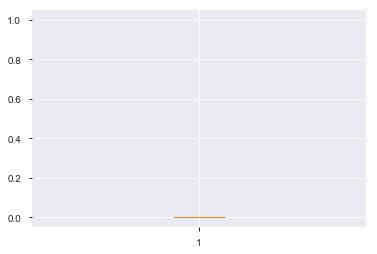

In [25]:
plt.boxplot(df.mag_record_type)

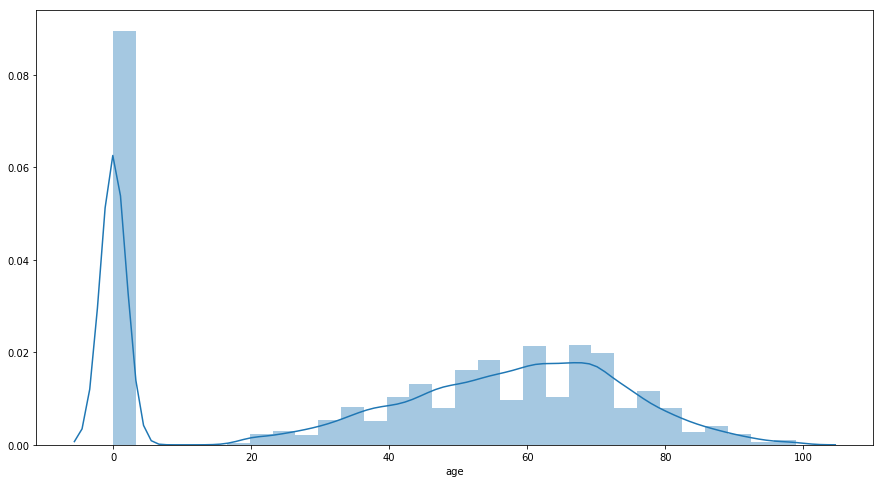

In [6]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(df.age, bins =30)

In [21]:
df1.age.isnull().sum()

0

In [33]:
numerical_columns=df1.select_dtypes(exclude='object')

In [7]:
catagorical_columns=df1.select_dtypes(include='object')

In [8]:
cat_column=df1.select_dtypes(include='object').columns

In [9]:
sf=df1[cat_column].isnull().sum() >0 

In [23]:
sf1 = pd.DataFrame(data=sf.index, columns=['columnname'])
sf2 = pd.DataFrame(data=sf.values, columns=['list'])
sf_ = pd.merge(sf1, sf2, left_index=True, right_index=True)
sf_
sf_=sf_.drop(sf_.index[0:8])

In [24]:
Nullcolumns=sf_[sf_['list']==True].columnname

In [97]:
type(Nullcolumns)

pandas.core.series.Series

In [25]:
Nullcolumns.tolist()

['ib_home_market_value',
 'ib_comm_involve_don_cultural',
 'ib_comm_involve_political',
 'ib_home_furnishings',
 'ib_magazines',
 'ib_womens_apparel',
 'ib_bank_credcard',
 'ib_gas_credcard',
 'ib_credcard_buyer',
 'ib_upscale_dept_store_credcard',
 'ib_beauty_cosmetics',
 'ib_reading_fin_newsltr_subs',
 'ib_wireless_product_buyer',
 'ib_sports',
 'ib_outdoors',
 'ib_travel',
 'ib_reading',
 'ib_food_cooking',
 'ib_exercise_health',
 'ib_stereo_video',
 'ib_electronics_computers',
 'ib_home_improvements',
 'ib_investing_finance',
 'ib_antiques_collectibles',
 'ib_children_presence_hh_100',
 'ib_gender_head_of_hh',
 'ib_gender_input_ind',
 'ib_home_equity_avail',
 'ib_home_owner_renter_100',
 'ib_mail_order_buyer',
 'ib_mail_responder',
 'ib_marital_status',
 'ib_occupation_customer',
 'ib_occupation_head_of_hh',
 'ib_own_rent_home',
 'ib_prem_dwelling_size',
 'ib_presence_of_children',
 'ib_voter_party',
 'ib_fashion',
 'ib_community_charities',
 'ib_arts',
 'ib_cooking_gourmet',
 'ib_

In [26]:
for i in Nullcolumns:
    df1[i].fillna('N', inplace=True)

In [99]:
print(Nullcolumns.tolist())

['mag_expiration_date', 'date_individual_added', 'city', 'state', 'country_code', 'ac_nielsen_county_size_code', 'ib_home_market_value', 'ib_comm_involve_don_cultural', 'ib_comm_involve_political', 'ib_home_furnishings', 'ib_magazines', 'ib_womens_apparel', 'ib_bank_credcard', 'ib_gas_credcard', 'ib_credcard_buyer', 'ib_upscale_dept_store_credcard', 'ib_beauty_cosmetics', 'ib_reading_fin_newsltr_subs', 'ib_wireless_product_buyer', 'ib_sports', 'ib_outdoors', 'ib_travel', 'ib_reading', 'ib_food_cooking', 'ib_exercise_health', 'ib_stereo_video', 'ib_electronics_computers', 'ib_home_improvements', 'ib_investing_finance', 'ib_antiques_collectibles', 'ib_children_presence_hh_100', 'ib_gender_head_of_hh', 'ib_gender_input_ind', 'ib_home_equity_avail', 'ib_home_owner_renter_100', 'ib_mail_order_buyer', 'ib_mail_responder', 'ib_marital_status', 'ib_occupation_customer', 'ib_occupation_head_of_hh', 'ib_own_rent_home', 'ib_prem_dwelling_size', 'ib_presence_of_children', 'ib_voter_party', 'ib_fas

In [27]:
df1[cat_column].isnull().sum()  

mag_expiration_date                   2
email_presence_flag                   0
date_individual_added               347
city                               8147
state                               139
country_code                        380
ac_nielsen_county_size_code       22289
gender                                0
customer_type                         0
ib_home_market_value                  0
ib_comm_involve_don_cultural          0
ib_comm_involve_political             0
ib_home_furnishings                   0
ib_magazines                          0
ib_womens_apparel                     0
ib_bank_credcard                      0
ib_gas_credcard                       0
ib_credcard_buyer                     0
ib_upscale_dept_store_credcard        0
ib_beauty_cosmetics                   0
ib_reading_fin_newsltr_subs           0
ib_wireless_product_buyer             0
ib_sports                             0
ib_outdoors                           0
ib_travel                             0


In [105]:
df1.head()

ind_urn mag_expiration_date  mag_record_type  products_recently_purchased  \
0     1959          2002-09-30                0                            9   
1     3210          2009-08-31                0                           18   
2     5391          1998-02-28                0                            6   
3     7197          2014-04-30                0                           12   
4     8184          2019-08-31                0                           75   

  email_presence_flag date_individual_added city state country_code  \
0                   Y            1996-07-15   SP    MA            U   
1                   N            1996-07-15   EA    MA            U   
2                   Y            1997-04-15   GI    PA            U   
3                   Y            1996-07-15   PA    MA            U   
4                   Y            1996-07-15   PA    FL            U   

  ac_nielsen_county_size_code        ...        ib_auto_work_mechanic  \
0                           B        ...                            N   
1                           B        ...                            N   
2                           A        ...                            N   
3                           B        ...                            Y   
4                           A        ...                            N   

   ib_dieting_weight_loss ib_other_pets  ib_parenting ib_collectible_gen  \
0                       N             N             N                  N   
1                       N             Y             Y                  N   
2                       N             N             Y                  N   
3                       Y             Y             Y                  Y   
4                       N             N             Y                  N   

  ib_collectible_antique ib_home_furnish_decorate ib_gardening HomeValue  \
0                      N                        N            N         K   
1                      N                        Y            Y         K   
2                      N                        Y            N         I   
3                      Y                        Y            Y         F   
4                      Y                        Y            Y         M   

  Active_Subscriber  
0                 Y  
1                 Y  
2                 Y  
3                 Y  
4                 Y  

[5 rows x 84 columns]

In [106]:
numerical_columns.columns

Index(['ind_urn', 'mag_record_type', 'products_recently_purchased', 'age',
       'ib_household_income', 'ib_adults_num_hh_100',
       'ib_age_1st_individual_100', 'ib_children_num_hh_100',
       'ib_education_1st_ind_100', 'ib_home_year_built',
       'ib_household_size_100', 'ib_length_of_residence_100',
       'ib_net_worth_estimator', 'ib_travel_business_domestic'],
      dtype='object')

In [34]:
numerical_columns.isnull().sum()

ind_urn                             0
mag_record_type                     0
products_recently_purchased         0
age                                 0
ib_household_income                 0
ib_adults_num_hh_100                0
ib_age_1st_individual_100           0
ib_children_num_hh_100              0
ib_education_1st_ind_100       251642
ib_home_year_built                  0
ib_household_size_100               0
ib_length_of_residence_100          0
ib_net_worth_estimator              0
ib_travel_business_domestic         0
dtype: int64

In [109]:
numerical_columns.head()

ind_urn  mag_record_type  products_recently_purchased  age  \
0     1959                0                            9   52   
1     3210                0                           18   88   
2     5391                0                            6   52   
3     7197                0                           12   62   
4     8184                0                           75   70   

   ib_household_income  ib_adults_num_hh_100  ib_age_1st_individual_100  \
0                  7.0                   1.0                       78.0   
1                  1.0                   2.0                       98.0   
2                  7.0                   3.0                       52.0   
3                  2.0                   1.0                       62.0   
4                  7.0                   2.0                       74.0   

   ib_children_num_hh_100  ib_education_1st_ind_100  ib_home_year_built  \
0                     0.0                       1.0                 NaN   
1                     0.0                       3.0              1954.0   
2                     1.0                       3.0                 NaN   
3                     1.0                       1.0                 NaN   
4                     1.0                       3.0              1992.0   

   ib_household_size_100  ib_length_of_residence_100  ib_net_worth_estimator  \
0                    1.0                        15.0                     NaN   
1                    2.0                        15.0                     8.0   
2                    4.0                        14.0                     7.0   
3                    2.0                        15.0                     6.0   
4                    3.0                         6.0                     9.0   

   ib_travel_business_domestic  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0

In [28]:
df1['ib_household_income'].fillna((df1['ib_household_income'].median()), inplace=True)
df1['ib_adults_num_hh_100'].fillna((df1['ib_adults_num_hh_100'].median()), inplace=True)
df1['ib_age_1st_individual_100'].fillna((df1['ib_age_1st_individual_100'].median()), inplace=True)
df1['ib_children_num_hh_100'].fillna((df1['ib_children_num_hh_100'].median()), inplace=True)
df1['ib_home_year_built'].fillna((df1['ib_home_year_built'].median()), inplace=True)
df1['ib_household_size_100'].fillna((df1['ib_household_size_100'].median()), inplace=True)
df1['ib_net_worth_estimator'].fillna((df1['ib_net_worth_estimator'].median()), inplace=True)
df1['ib_travel_business_domestic'].fillna((df1['ib_travel_business_domestic'].median()), inplace=True)

In [31]:
df1['ib_length_of_residence_100'].fillna((df1['ib_length_of_residence_100'].median()), inplace=True)
df1['ib_travel_business_domestic'].fillna((df1['ib_travel_business_domestic'].median()), inplace=True)

In [ ]:
df1['ib_travel_business_domestic'].fillna((df1['ib_travel_business_domestic'].median()), inplace=True)

In [35]:
df1['ib_education_1st_ind_100'].value_counts()

1.0    344720
2.0    202383
3.0    200099
4.0      1156
Name: ib_education_1st_ind_100, dtype: int64

In [36]:
df1['ib_education_1st_ind_100'].isnull().sum()

251642

In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df1
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

ValueError: could not convert string to float: '2002-09-30'

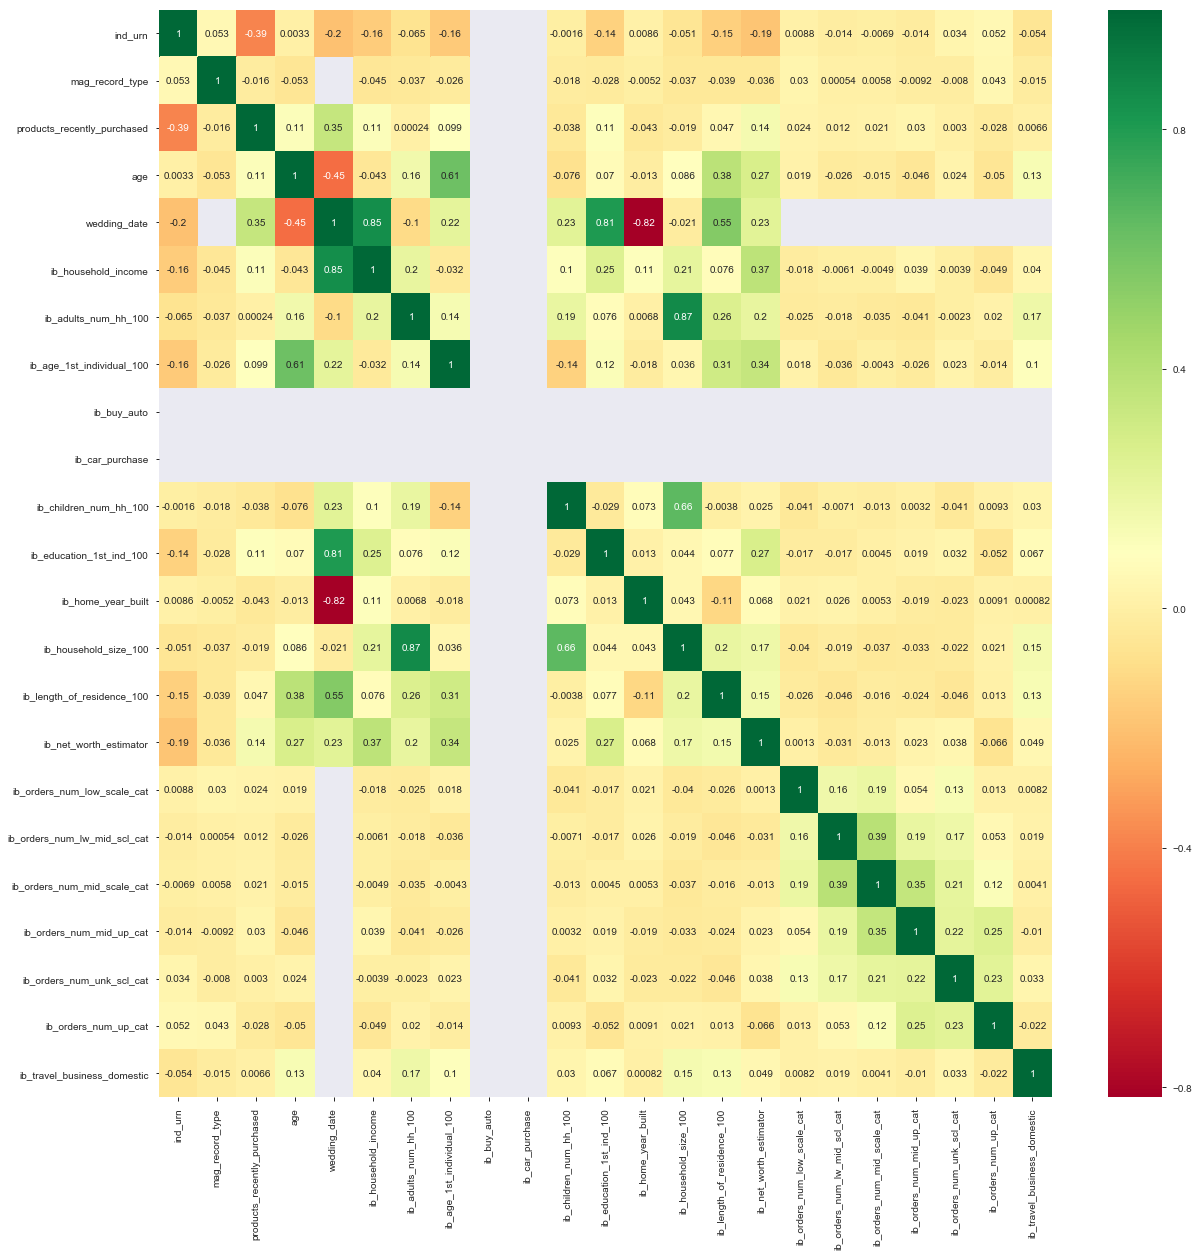

In [31]:
#verifying the correlation 
import pandas as pd
import numpy as np
import seaborn as sns
data = df1
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
import pandas as pd
import numpy as np

data = df1
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

C:\Users\VINOTH S\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: '2002-09-30'